# Image Posterization using K-means Clustering Algorithm

In [168]:
#import PIL as pil
from PIL import Image
from skimage import io
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import joblib

Image compression will be in a method that takes an image and a percentage of pixels to sample. The outputs will be the k selected and the compressed image.

In [169]:
driving = Image.open("driving.png")
#driving2 = io.imread('driving.png')
#print(driving)
#print(driving.format)
#driving

In [170]:
#driving2

In [171]:
print(driving)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x577 at 0x1FA62674E80>


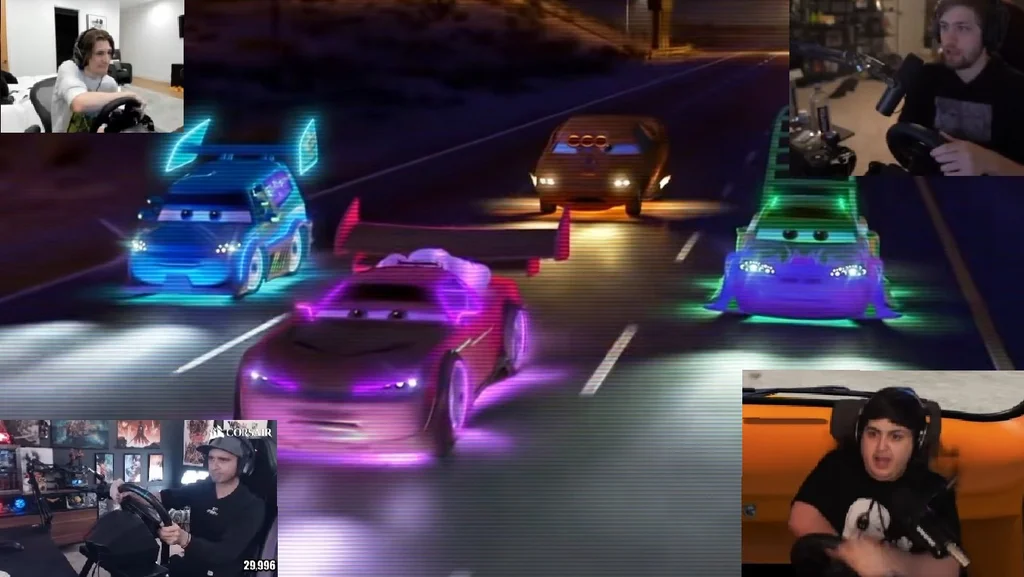

In [172]:
#How to decide which pixels are selected:
#If the number of pixels to be sampled is 100*k, then divide the number of pixels in the image by that value. Call
#the result n. Every nth pixel will be selected for sampling. To determine if pixel[i,j] is that nth pixel, do
# index = j*width + i to get the pixel index, then mod that value by n. If index % n = 0, you are on that pixel.

#inputs are image and percentage

drivingOriginal = driving
percentage = 0.10  #originally 0.02
pixels = driving.load()

#toSample = 10000
random.seed(a=100) # the random seed should not be based on system time
k = 100   #we would have a loop and iterate k

skip = int(1 / np.sqrt(percentage))
count = 0
size = np.ceil(driving.size[0] / skip) * np.ceil(driving.size[1] / skip)
df_pixels = pd.DataFrame(columns=list('RGB'), index = np.arange(size))

for i in range(0, driving.size[0], skip):
    for j in range(0, driving.size[1], skip):
        i_ = i + random.randint(-3,3)
        if i_>=driving.size[0]:
            i_ = driving.size[0] - 1
        if i_<0:
            i_ = 0
        j_ = j + random.randint(-3,3)
        if j_>=driving.size[1]:
            j_ = driving.size[1] - 1
        if j_<0:
            j_ = 0
            
        df_pixels.iloc[[count]] = [[pixels[i_,j_][0], pixels[i_,j_][1], pixels[i_,j_][2]]]
        #pixels[i_,j_] = (255,255,255)
        count = count + 1
driving

In [173]:
print(count)

66006


In [174]:
df_pixels

,R,G,B
0.0,69,38,19
1.0,69,38,19
2.0,78,39,23
3.0,79,39,23
4.0,80,40,24
...,...,...,...
66001.0,87,37,9
66002.0,86,38,11
66003.0,87,37,9
66004.0,79,35,9


Now that we have the RGB values of the sampled pixels in the dataset, we run K-means Clustering.
Options: different distance calculations. Euclidean and manhattan and some other one.
Do not force the centers.

In [175]:
df_sample = df_pixels.sample(n=k, random_state=1).reindex()
df_sample

,R,G,B
9580.0,135,162,178
29364.0,2,0,12
26079.0,7,0,16
27669.0,24,6,28
7149.0,241,241,241
...,...,...,...
46941.0,18,7,18
59851.0,9,6,7
30196.0,129,63,174
17521.0,72,79,90


In [176]:
kmeans = KMeans(n_clusters=100) #k
kmeans.fit(df_sample) #run on df_pixels

kmeans.labels_

<ipython-input-176-5abd25664318>:2: ConvergenceWarning: Number of distinct clusters (99) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  kmeans.fit(df_sample) #run on df_pixels


array([51, 75, 37, 94,  5, 74, 69, 88, 68,  8, 87, 17, 80, 63, 14,  4, 77,
        3,  0, 70, 52, 89, 28, 34, 31,  1, 81, 76, 59, 62, 40, 84, 60, 27,
       13, 90, 44, 25, 56, 42, 86, 93, 24, 10, 11, 16, 53,  7, 85,  2, 66,
       71, 15, 55, 91, 19, 61, 30, 43, 39, 78, 18, 57, 98,  9, 22, 79, 82,
       92, 75, 41, 54, 32, 20, 35, 48, 26, 36, 45, 67, 50, 23, 47, 12, 73,
       33, 38, 95, 49, 65, 58, 97, 64, 21, 46, 96, 72, 29, 83,  6])

In [177]:
#kmeans.cluster_centers_[kmeans.labels_] 

In [178]:
joblib.dump(kmeans, 'kmeans.pkl')
kmeans_loaded = joblib.load('kmeans.pkl')

predicted = kmeans_loaded.predict([[161,67,19]])

In [179]:
print(str(int(kmeans.cluster_centers_[predicted][0][0])) + '    ' + str(kmeans.cluster_centers_[predicted][0])+'     '+pixels[0,0])

148    [148.  62.  18.]


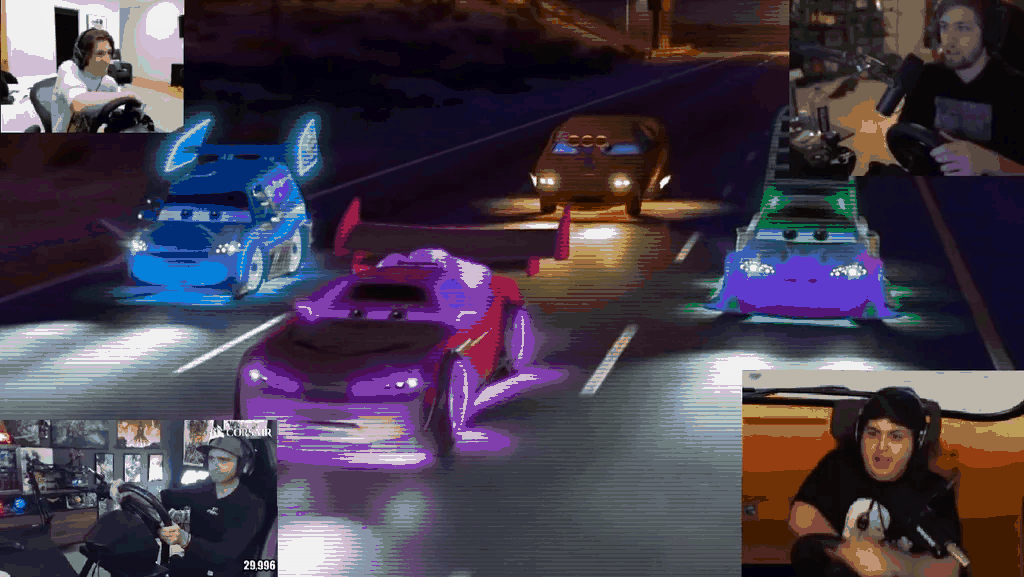

In [180]:
#loop through whole image, predict the group that a pixel belongs in,
#switch the color of the pixel to it's cluster center, record the difference to keep track of variance within groups.
for i in range(0, driving.size[0]):
    for j in range(0, driving.size[1]):
        predicted = kmeans_loaded.predict([[pixels[i,j][0], pixels[i,j][1], pixels[i,j][2]]])
        pixels[i,j] = (int(kmeans.cluster_centers_[predicted][0][0]), int(kmeans.cluster_centers_[predicted][0][1]), int(kmeans.cluster_centers_[predicted][0][2]))

driving

In [183]:
driving.save("compressed.png", format="png")
print("Hello from the other END")

Hello from the other END
